In [229]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [230]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [231]:
# Data Cleaner

def CleanData(df):
  df['max_cycle'] = df['id'].map(df.groupby('id')['cycle'].max())
  df['remaining_cycle'] = df['max_cycle'] - df['cycle']
  df.drop('max_cycle', axis=1, inplace=True)

  return df


In [232]:
# Bin Creator

def CreateBin(df):
  max_val = df['remaining_cycle'].max()
  upper = max(max_val, 151)

  df['remaining_cycle_bin'] = pd.cut(
      df['remaining_cycle'],
      bins=[-1, 50, 150, upper],
      labels=[0, 1, 2]
  )
  df.drop('remaining_cycle', axis=1, inplace=True)

  return df

In [233]:
# Correlation Matrix

def CorrelationMatrix(df):

  corr_matrix = df.corr()

  plt.figure(figsize=(24,24))
  sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
  plt.title("Correlation matrix of operational settings and sensors")
  plt.show()

In [234]:
# Remove columns

def RemoveCols(df):
  df = df.drop(columns=['s1', 'os2', 'os3', 's5', 's10', 's18', 's16', 's19'])

  return df

In [235]:
column_names = ['id', 'cycle',
                'os1', 'os2', 'os3'] + \
               [f's{i}' for i in range(1, 22)]

In [236]:
#Select Max Cycle row

def SelectMaxCycleRow(df):
  df = df.loc[df.groupby('id')['cycle'].idxmax()].reset_index(drop=True)

  return df

In [237]:
# RLU and Test Dataset Mapping

def RluAndTest(df, rlu):
    rlu = rlu.reset_index()
    rlu.rename(columns={'index': 'id'}, inplace=True)
    rlu['id'] = rlu['id'] + 1

    df['remaining_cycle'] = df['id'].map(rlu.set_index('id')['remaining_cycle'])

    return df


# FD001

In [238]:
dfFD001 = pd.read_csv('/content/drive/MyDrive/UOM/Advanced AI/train_FD001.txt', sep='\s+', header=None, names=column_names)

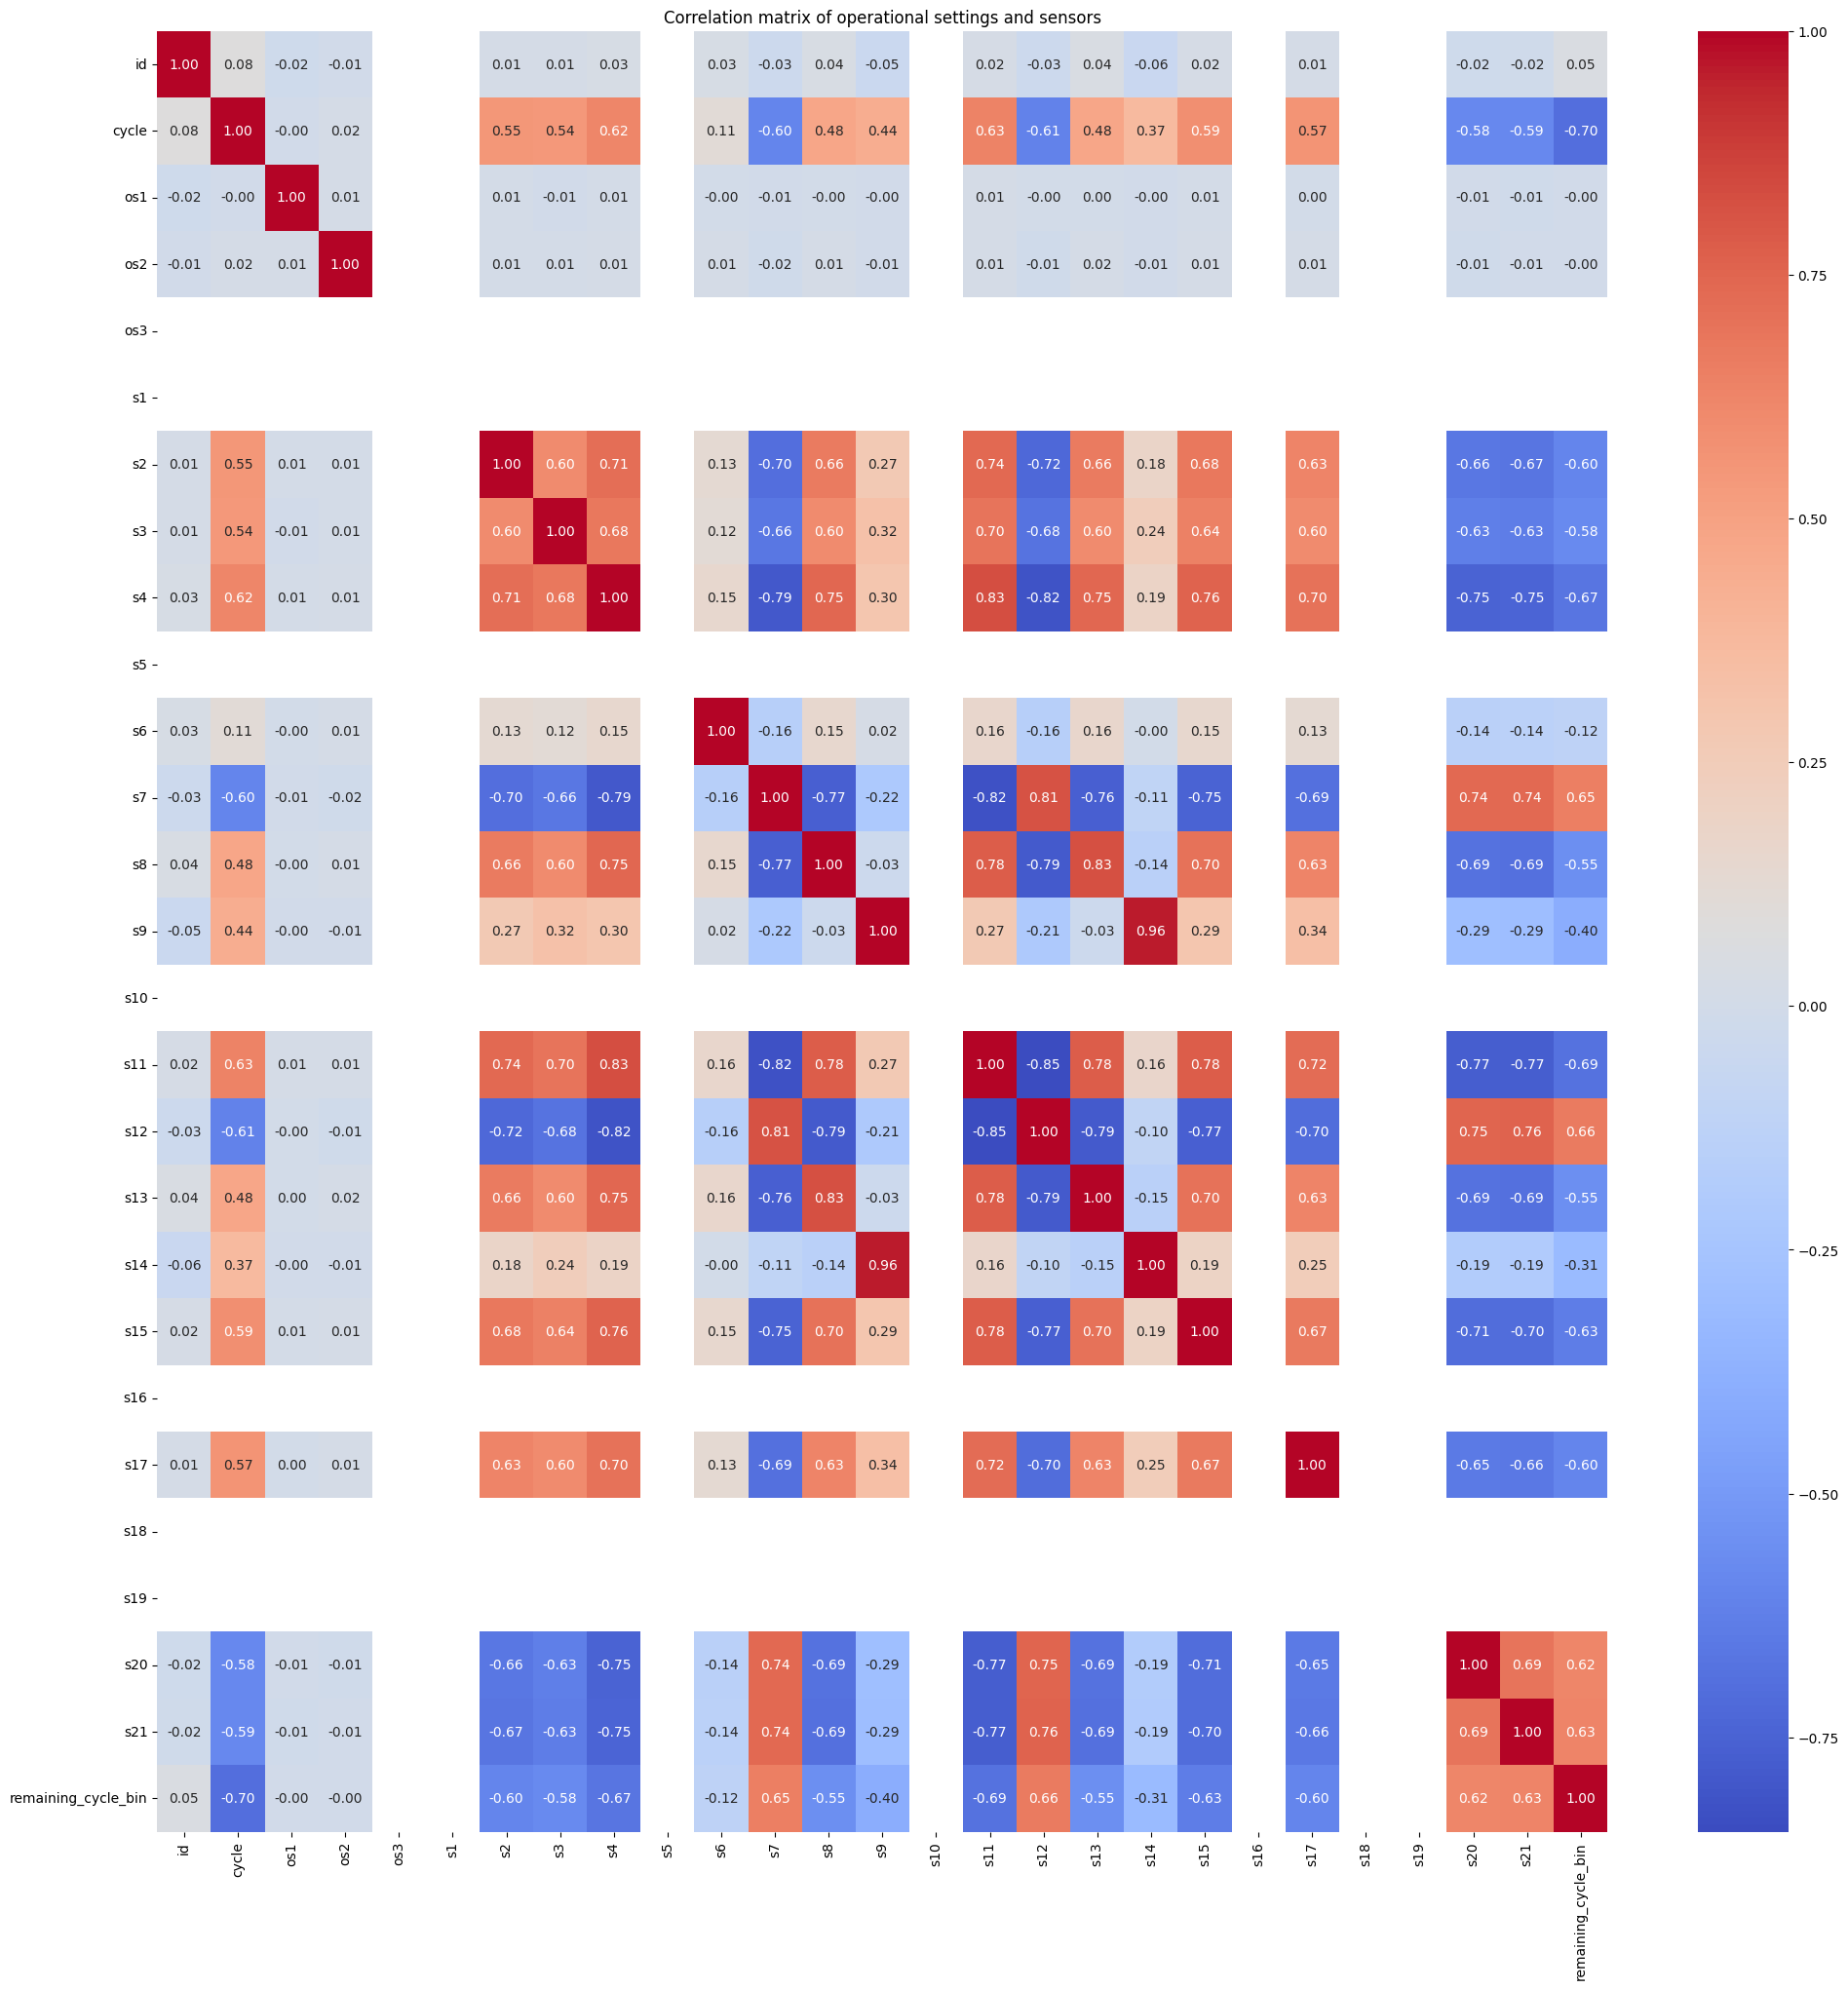

In [239]:
dfFD001 = CleanData(dfFD001)
dfFD001 = CreateBin(dfFD001)
CorrelationMatrix(dfFD001)

In [240]:
dfFD001 = RemoveCols(dfFD001)

In [241]:
X = dfFD001.drop(columns=['remaining_cycle_bin'])  # features
y = dfFD001['remaining_cycle_bin']                 # target labels

rf_clf = RandomForestClassifier(n_estimators=500, max_depth=15, random_state=42)

rf_clf.fit(X, y)

RandomForestClassifier(max_depth=15, n_estimators=500, random_state=42)

In [253]:
dfFD001_test = pd.read_csv('/content/drive/MyDrive/UOM/Advanced AI/test_FD001.txt', sep='\s+', header=None, names=column_names)

In [254]:
dfFD001_test

,id,cycle,os1,os2,os3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [255]:
col_Name = ['remaining_cycle']
RUL_FD001 = pd.read_csv('/content/drive/MyDrive/UOM/Advanced AI/RUL_FD001.txt', header=None, names=col_Name)

In [256]:
dfFD001_test = RluAndTest(dfFD001_test, RUL_FD001)
dfFD001_test = SelectMaxCycleRow(dfFD001_test)
dfFD001_test = RemoveCols(dfFD001_test)

In [257]:
dfFD001_test

,id,cycle,os1,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,remaining_cycle
0,1,31,-0.0006,642.58,1581.22,1398.91,21.61,554.42,2388.08,9056.40,47.23,521.79,2388.06,8130.11,8.4024,393,38.81,23.3552,112
1,2,49,0.0018,642.55,1586.59,1410.83,21.61,553.52,2388.10,9044.77,47.67,521.74,2388.09,8126.90,8.4505,391,38.81,23.2618,98
2,3,126,-0.0016,642.88,1589.75,1418.89,21.61,552.59,2388.16,9049.26,47.88,520.83,2388.14,8131.46,8.4119,395,38.93,23.2740,69
3,4,106,0.0012,642.78,1594.53,1406.88,21.61,552.64,2388.13,9051.30,47.65,521.88,2388.11,8133.64,8.4634,395,38.58,23.2581,82
4,5,98,-0.0013,642.27,1589.94,1419.36,21.61,553.29,2388.10,9053.99,47.46,521.00,2388.15,8125.74,8.4362,394,38.75,23.4117,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,97,-0.0006,642.30,1590.88,1397.94,21.61,553.99,2388.03,9062.41,47.14,522.30,2388.01,8148.24,8.4110,391,38.96,23.4606,137
96,97,134,0.0013,642.59,1582.96,1410.92,21.61,554.05,2388.06,9076.36,47.38,521.58,2388.06,8155.48,8.4500,395,38.61,23.2953,82
97,98,121,0.0017,642.68,1599.51,1415.47,21.61,553.44,2388.13,9062.34,47.66,521.53,2388.09,8146.39,8.4235,394,38.76,23.3608,59
98,99,97,0.0047,642.00,1585.03,1397.98,21.61,554.75,2388.01,9067.16,47.26,521.82,2388.02,8150.38,8.4003,391,38.95,23.3595,117


In [258]:
dfFD001_test = CreateBin(dfFD001_test)

In [259]:
dfFD001_test

,id,cycle,os1,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,remaining_cycle_bin
0,1,31,-0.0006,642.58,1581.22,1398.91,21.61,554.42,2388.08,9056.40,47.23,521.79,2388.06,8130.11,8.4024,393,38.81,23.3552,1
1,2,49,0.0018,642.55,1586.59,1410.83,21.61,553.52,2388.10,9044.77,47.67,521.74,2388.09,8126.90,8.4505,391,38.81,23.2618,1
2,3,126,-0.0016,642.88,1589.75,1418.89,21.61,552.59,2388.16,9049.26,47.88,520.83,2388.14,8131.46,8.4119,395,38.93,23.2740,1
3,4,106,0.0012,642.78,1594.53,1406.88,21.61,552.64,2388.13,9051.30,47.65,521.88,2388.11,8133.64,8.4634,395,38.58,23.2581,1
4,5,98,-0.0013,642.27,1589.94,1419.36,21.61,553.29,2388.10,9053.99,47.46,521.00,2388.15,8125.74,8.4362,394,38.75,23.4117,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,97,-0.0006,642.30,1590.88,1397.94,21.61,553.99,2388.03,9062.41,47.14,522.30,2388.01,8148.24,8.4110,391,38.96,23.4606,1
96,97,134,0.0013,642.59,1582.96,1410.92,21.61,554.05,2388.06,9076.36,47.38,521.58,2388.06,8155.48,8.4500,395,38.61,23.2953,1
97,98,121,0.0017,642.68,1599.51,1415.47,21.61,553.44,2388.13,9062.34,47.66,521.53,2388.09,8146.39,8.4235,394,38.76,23.3608,1
98,99,97,0.0047,642.00,1585.03,1397.98,21.61,554.75,2388.01,9067.16,47.26,521.82,2388.02,8150.38,8.4003,391,38.95,23.3595,1


In [260]:
X = dfFD001_test.drop(columns=['remaining_cycle_bin'])  # features
y_actual = dfFD001_test['remaining_cycle_bin']                 # target labels

y_pred = rf_clf.predict(X)

# 7. Evaluate performance
print("Accuracy:", accuracy_score(y_pred, y_actual))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.85


ValueError: Found input variables with inconsistent numbers of samples: [4127, 100]

# FD002

In [ ]:
dfFD002 = pd.read_csv('/content/drive/MyDrive/UOM/Advanced AI/train_FD002.txt', sep='\s+', header=None, names=column_names)